# Lab Exercise 03: Exploring Wavenumbers and Spatial Sampling in Temperature Measurements

## Objective:
In this exercise, you will simulate measuring temperature across a field and explore how the spacing between sensors affects your ability to detect spatial features. You will calculate the fundamental wavenumber and Nyquist wavenumber and observe how changing the sensor spacing impacts your measurements.

**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2425-lastname/exercises/exercise_03_wavenumbers.ipynb**)

---
## Part 1: Simulating Temperature Across a Field

Task: Simulate a temperature field that varies across a 100-meter-wide field. Assume that the temperature varies in a sinusoidal manner across the field.

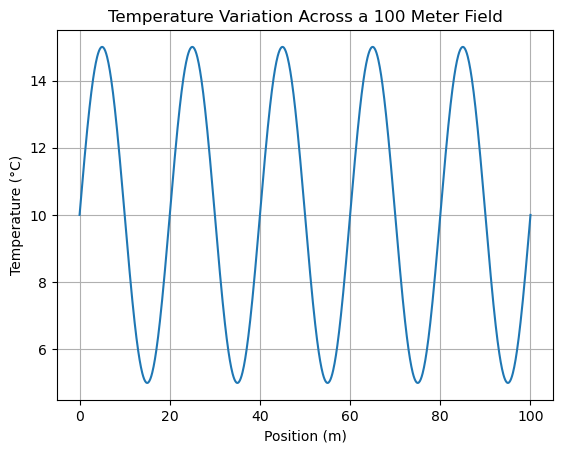

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the field
L = 100 # in meters

# Define the wavelength of the temperature wave (e.g., temperature changes every 20 meters)
wavelength = 20  # meters
k = 2 * np.pi / wavelength  # wavenumber

# Generate positions across the field (fine resolution)
x_fine = np.linspace(0, L, 1000)  # 1000 points across the field

# Generate the temperature variation across the field
temperature = 10 + 5 * np.sin(k * x_fine)  # Sinusoidal temperature wave

# Plot the temperature variation
plt.plot(x_fine, temperature)
plt.title("Temperature Variation Across a 100 Meter Field")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


### Questions:

What does the wavelength represent in this context? How often does the temperature change across the field?

## Answer:
1. The temperature is shown to rise and fall at certain intervals and height across the field, suggesting an oscillation.

---
## Part 2: Exploring Sensor Spacing

Now, we’ll simulate measuring the temperature using sensors placed at regular intervals across the field.

Task: Change the sensor spacing and observe how well you can capture the temperature wave.

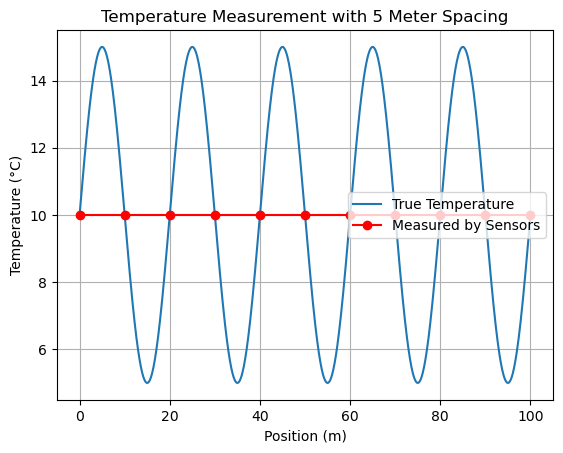

In [27]:
# Define the sensor spacing (e.g., 5 meters)
sensor_spacing = 10  # meters

# Generate positions where the sensors are placed
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)  # Sensor positions

# Measure the temperature at the sensor positions
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the temperature measured by the sensors
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label = "Measured by Sensors", color='r')
plt.title("Temperature Measurement with 5 Meter Spacing")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Questions:

1. How well does the sensor-based measurement (red line) match the true temperature variation?
2. What would happen if the spacing between the sensors was larger? Change the sensor spacing to 10 meters and re-run the code.

## Answer:
1. Although the sensor measurement looks sharp, the sensor measurement is similar to the actual value of the true temperature.
3. The sensors only detected the values at certain distances along the 10 deg, but is not able to detect those of higher and lower values (crest & trough) It signifies that sensor spacing is an important factor in gathering data close to the actual.

---
## Part 3: Calculating Fundamental and Nyquist Wavenumbers

Task: Calculate the fundamental wavenumber and Nyquist wavenumber for the given scenario.

- The fundamental wavenumber represents the longest wave (or temperature trend) that spans the entire field.
- The Nyquist wavenumber represents the shortest wave that can be detected by your sensors.

In [28]:
# Calculate the fundamental wavenumber
L =  100 # Length of the field in meters
k_0 = 2 * np.pi / L  # Fundamental wavenumber

# Calculate the Nyquist wavenumber based on sensor spacing
k_n = np.pi / 10  # Nyquist wavenumber

# Print the results
print(f"Fundamental Wavenumber: {k_0:.3f} radians/m")
print(f"Nyquist Wavenumber (with {10}m spacing): {k_n:.3f} radians/m")


Fundamental Wavenumber: 0.063 radians/m
Nyquist Wavenumber (with 10m spacing): 0.314 radians/m


### Questions:

1. What is the fundamental wavenumber? What does this tell you about the largest feature (or longest wave) you can detect in the field?
2. What is the Nyquist wavenumber for 5-meter spacing? What about for 10-meter spacing? How does increasing the sensor spacing affect your ability to detect smaller features?

## Answer:
1. This shows that the fundamental wavenumber corresponds to the longest wavenumber, which has a measurement of 0.063 radians/m
2. For 5-meter sensor spacing, the Nyquist wavenumber is 0.628 radians/m, detecting smaller features down to a 10-meter wavelength. However, with 10-meter spacing, the Nyquist wavenumber decreases to 0.314 radians/m, which hinders its ability to detect finer details and smaller features in the field. This signifies that increasing the sensor spacing reduces the Nyquist wavenumber, lowering the spatial resolution, and limiting the detection of small-scale features.

---
### Part 4: Aliasing and Sampling Resolution

When the sensor spacing becomes too large, we may not be able to detect certain temperature variations correctly due to aliasing. Let's explore this concept.

Task: Increase the sensor spacing to 15 meters and observe the effect.

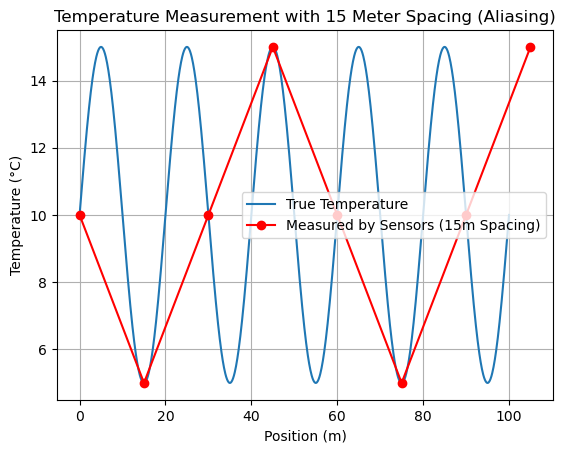

In [29]:
# Increase the sensor spacing to 15 meters
sensor_spacing = 15 # meters
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (15m Spacing)", color='r')
plt.title("Temperature Measurement with 15 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Questions:

1. What happens to the accuracy of your temperature measurements when the sensor spacing is increased to 15 meters?
2. Explain aliasing in this context. Why does it occur when the sensor spacing exceeds a certain limit?

## Answer
1. The discrepancy between the 2 measurements increased because the sensors are too far apart. This led to a failure in capturing finer temperature variations accurately, leading to aliasing.
2. Basically aliasing happens when the sensor spacing is too far apart, failing to capture the finer variations in the field. Any temperature changes occurring over shorter distances cannot be correctly resolved since the sensors only sample at 15m intervals. This causes measurement errors, less accuracy, and variability that doesn't necessarily capture the data.

### Final Questions

1. How does sensor spacing affect your ability to resolve both large-scale and small-scale temperature changes across the field?
2. How do the fundamental wavenumber and Nyquist wavenumber help you determine the types of temperature variations you can detect?
3. Why is it important to consider both the spatial resolution (sensor spacing) and the wavenumbers when designing a measurement system for temperature or other physical parameters?

## Answer:
1. Sensor spacing basically affects how nuanced the data gathered can be. The smaller the distance of each sensor is, the more accurate measurement it can capture because more sensors can capture finer details by increasing the number of data points collected.
2. The fundamental wavenumber represents the largest feature that can be detected across the field, while the Nyquist wavenumber defines the smallest feature that can be accurately resolved based on the sensor spacing. Therefore, there is a "sweet spot" for the most optimal/efficient amount of data that could accurately capture the data pattern.
3. This is because the sensor spacing dictates the density of data points, while wavenumbers indicate the accuracy with which different scales of variation can be measured. The wavenumber then tells its accuracy. Balancing the two factors (determining how many and how small) will determine how large and accurate the outcome of the data will be.